In [3]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

df = pd.read_csv("../data/processed/titanic_clean.csv")

for c in ["Sex","Embarked","Pclass","Title","AgeBin","FareBin"]:
    if c in df.columns:
        df[c] = df[c].astype("category")

figdir = Path("../reports/figures")
figdir.mkdir(parents=True, exist_ok=True)

def savefig(name: str):
    plt.tight_layout()
    plt.savefig(figdir / name, dpi=200, bbox_inches="tight")


In [4]:
print("Shape:", df.shape)
display(df.head(3))
df.info()

Shape: (891, 15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeBin,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,Adult,Q1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,Adult,Q4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,Adult,Q2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    category
 10  FamilySize   891 non-null    int64   
 11  IsAlone      891 non-null    int64   
 12  Title        891 non-null    category
 13  AgeBin       891 non-null    category
 14  FareBin      891 non-null    category
dtypes: category(6), float64(2), int64(6), object(1)
memory usage: 69.0+ KB


In [6]:
display(df.describe())
df.isna().sum().sort_values(ascending=False)

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.112424,0.523008,0.381594,27.043158,1.904602,0.602694
std,257.353842,0.486592,13.304424,1.102743,0.806057,27.339465,1.613459,0.489615
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,21.500000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,26.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,668.500000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,100.268800,11.000000,1.000000


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
Title          0
AgeBin         0
FareBin        0
dtype: int64

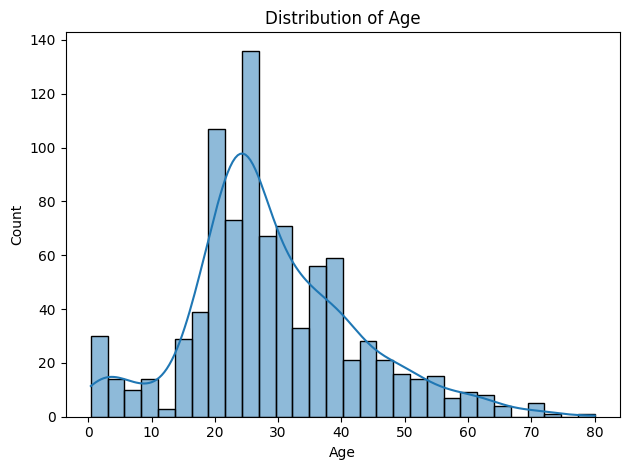

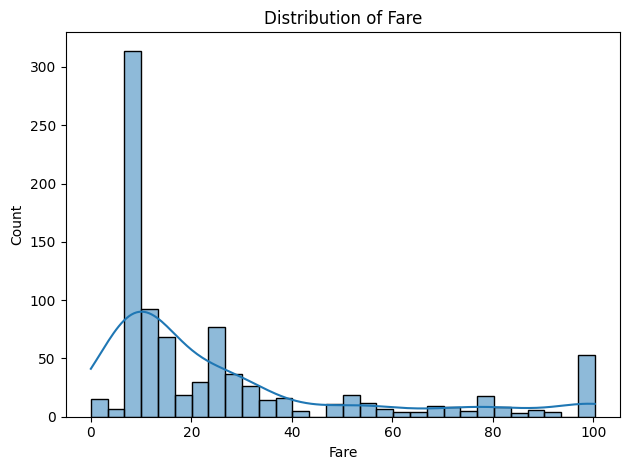

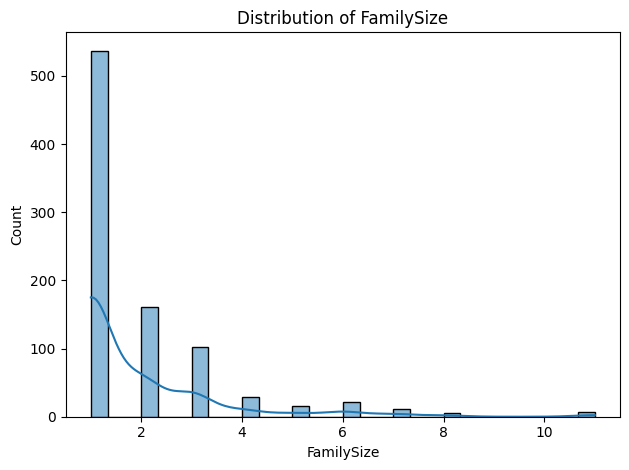

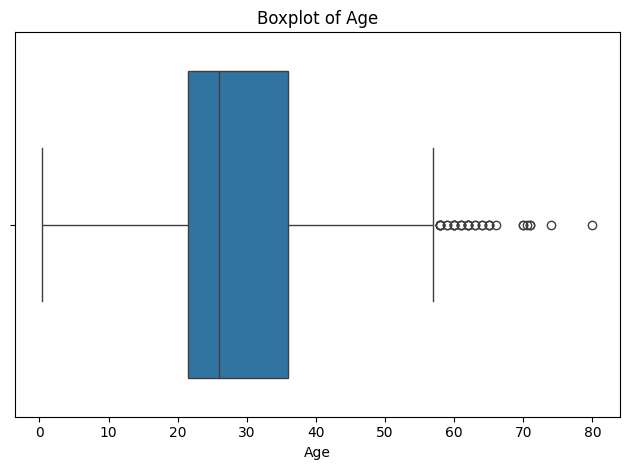

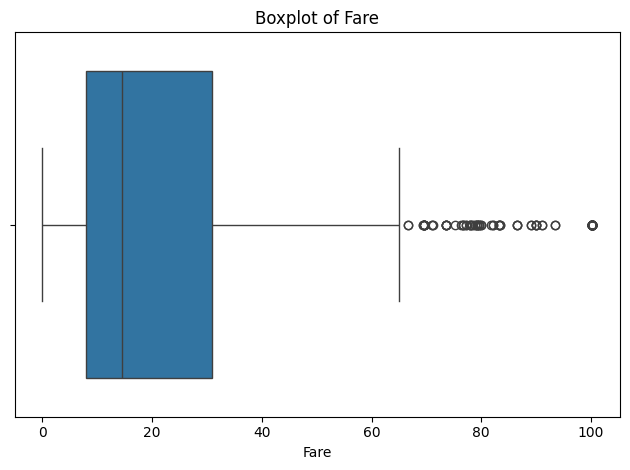

In [7]:
for col in ["Age","Fare","FamilySize"]:
    if col in df.columns:
        plt.figure()
        sns.histplot(data=df, x=col, bins=30, kde=True)
        plt.title(f"Distribution of {col}")
        savefig(f"dist_{col}.png")

for col in ["Age","Fare"]:
    if col in df.columns:
        plt.figure()
        sns.boxplot(data=df, x=col)
        plt.title(f"Boxplot of {col}")
        savefig(f"box_{col}.png")


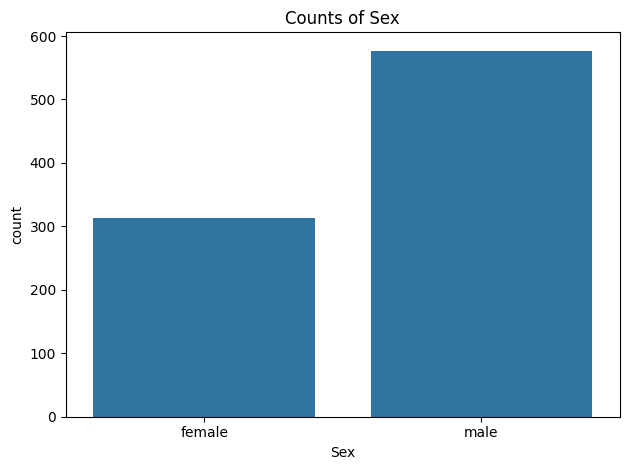

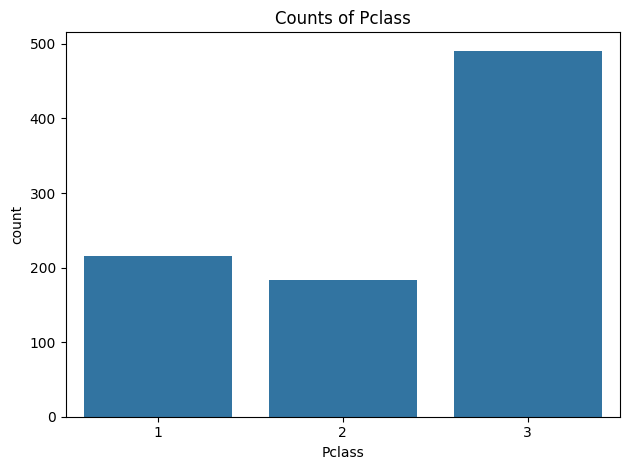

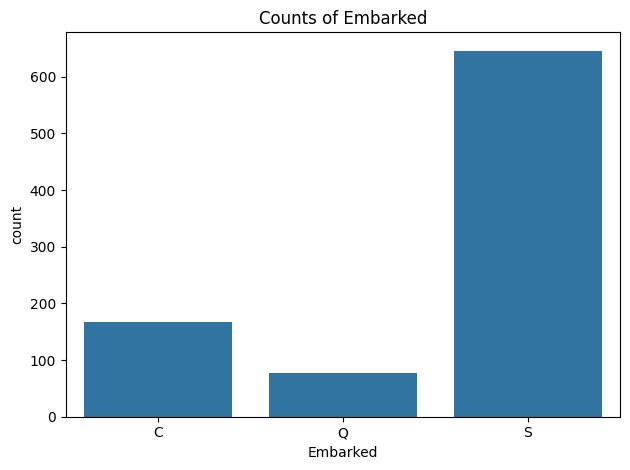

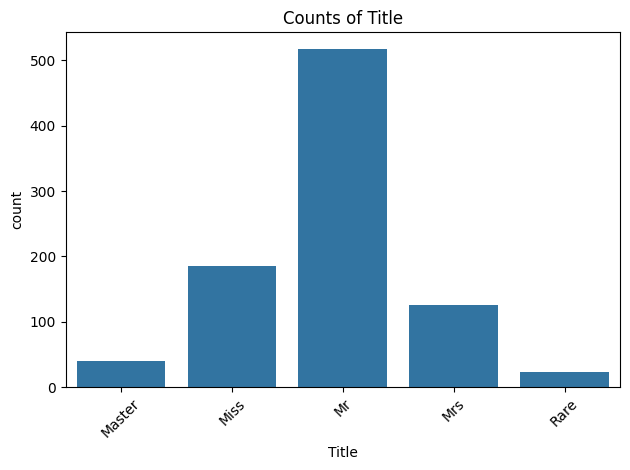

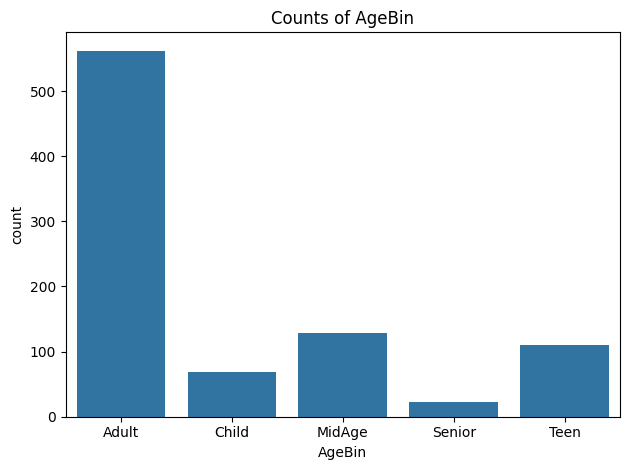

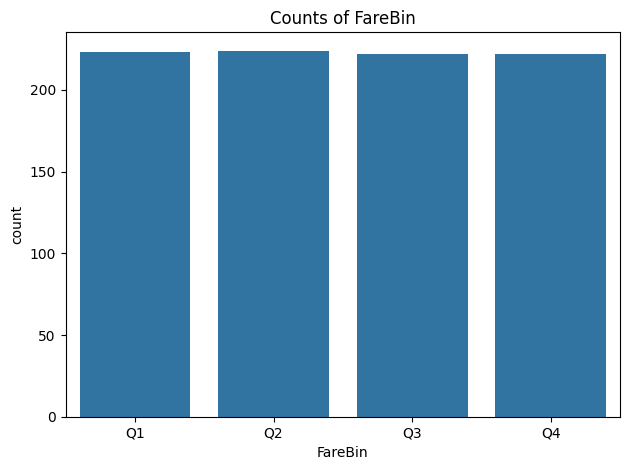

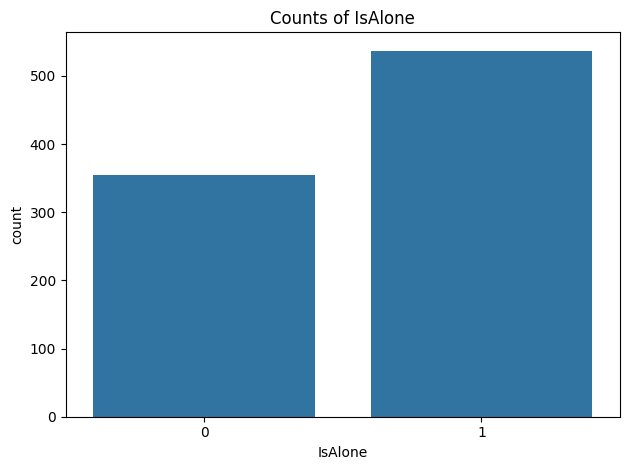

In [8]:
cat_cols = [c for c in ["Sex","Pclass","Embarked","Title","AgeBin","FareBin","IsAlone"] if c in df.columns]
for col in cat_cols:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f"Counts of {col}")
    plt.xticks(rotation=0 if col!="Title" else 45)
    savefig(f"count_{col}.png")


C:\Users\hasti_aksoy\AppData\Local\Temp\ipykernel_24720\187456952.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(col)["Survived"].mean().sort_values(ascending=False)
C:\Users\hasti_aksoy\AppData\Local\Temp\ipykernel_24720\187456952.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(col)["Survived"].mean().sort_values(ascending=False)
C:\Users\hasti_aksoy\AppData\Local\Temp\ipykernel_24720\187456952.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

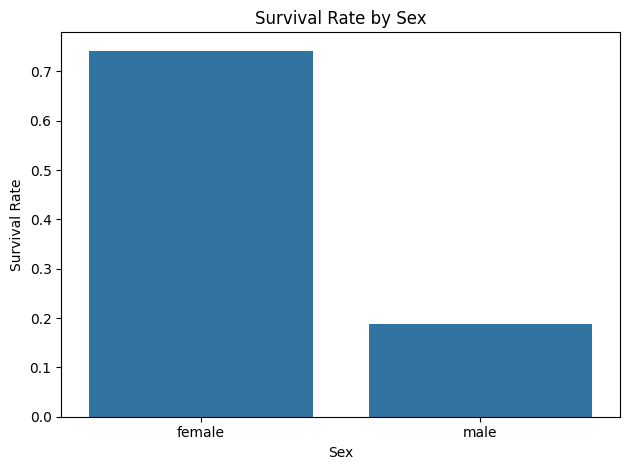

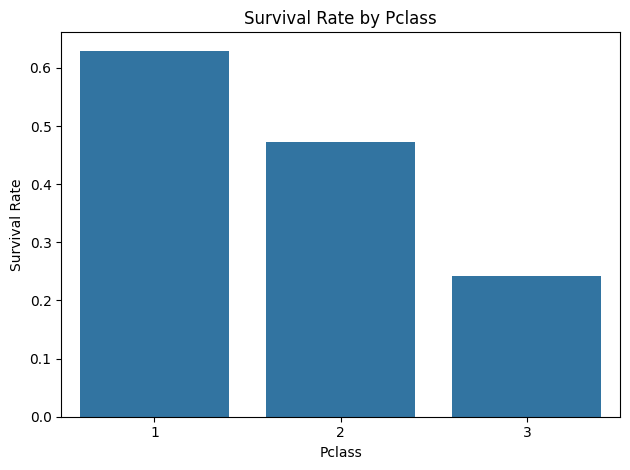

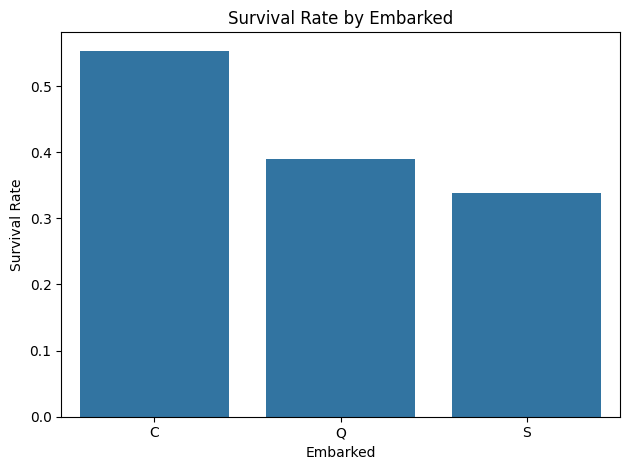

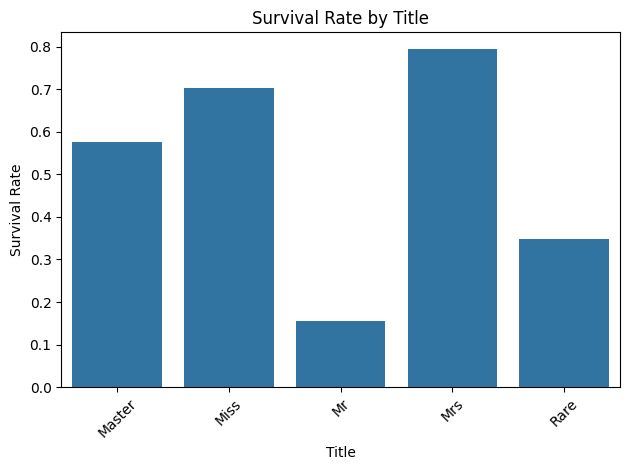

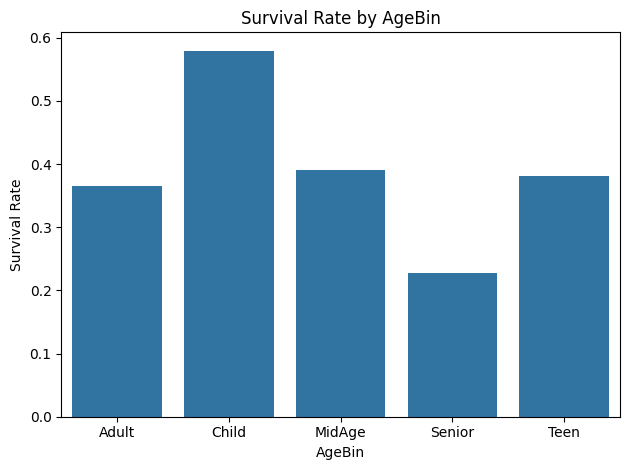

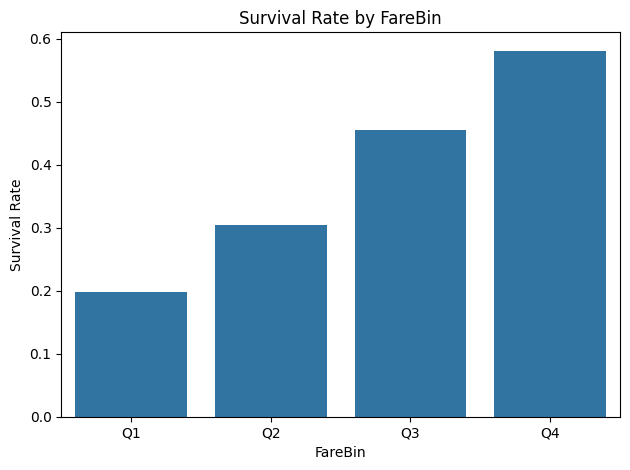

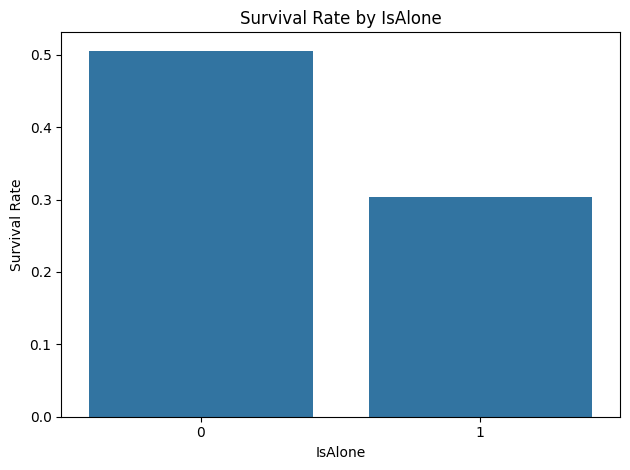

In [9]:
summary_tables = {}

def plot_survival_rate(col):
    rate = df.groupby(col)["Survived"].mean().sort_values(ascending=False)
    plt.figure()
    sns.barplot(x=rate.index, y=rate.values)
    plt.ylabel("Survival Rate")
    plt.title(f"Survival Rate by {col}")
    plt.xticks(rotation=0 if col!="Title" else 45)
    savefig(f"survival_rate_by_{col}.png")
    return rate

for col in ["Sex","Pclass","Embarked","Title","AgeBin","FareBin","IsAlone"]:
    if col in df.columns:
        summary_tables[col] = plot_survival_rate(col)

summary_tables.get("Sex")


In [10]:
pd.crosstab(df["Sex"], df["Survived"], normalize="index").round(3)

Survived,0,1
Sex,,
female,0.258,0.742
male,0.811,0.189


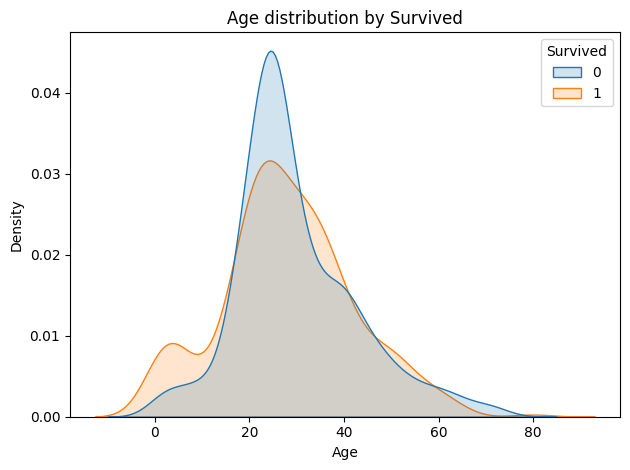

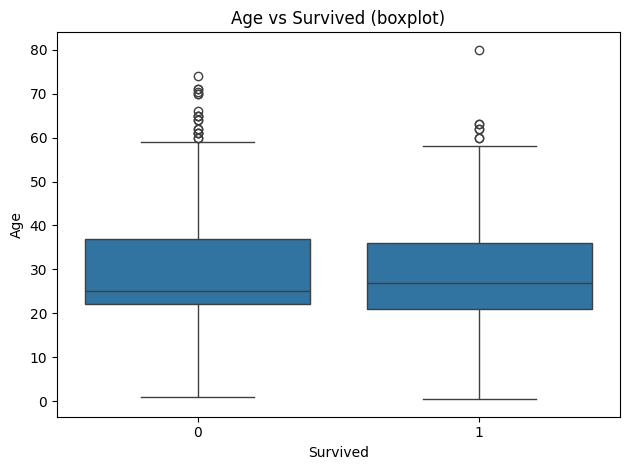

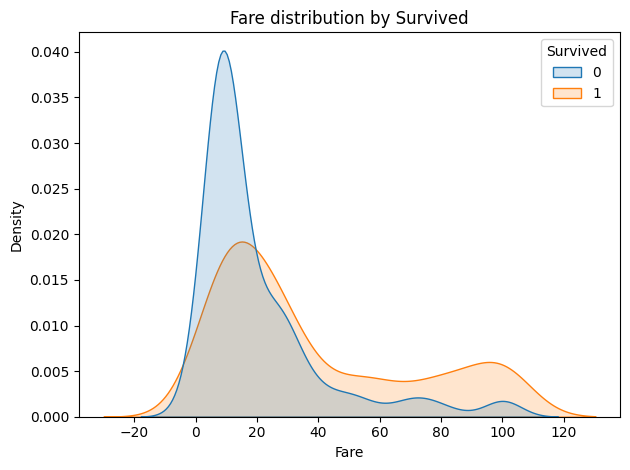

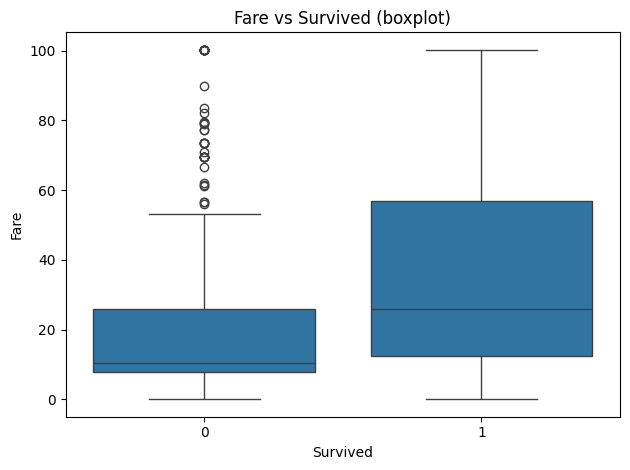

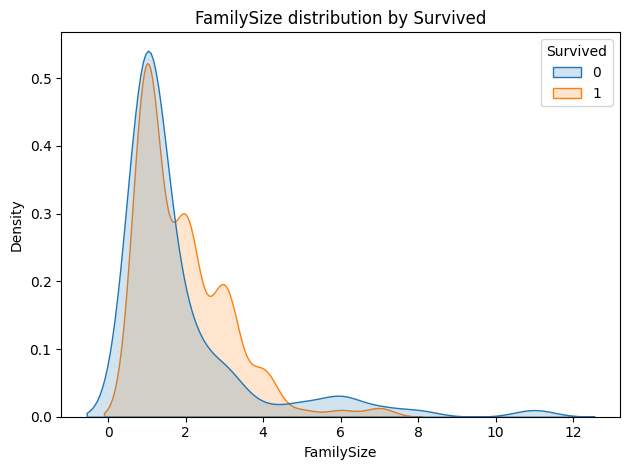

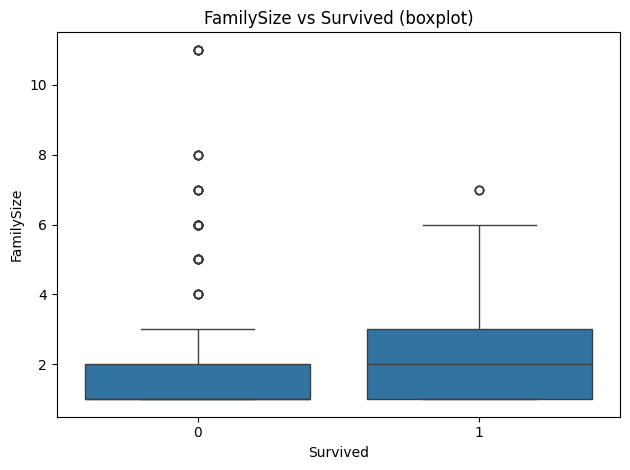

In [11]:
for col in ["Age","Fare","FamilySize"]:
    if col in df.columns:
        plt.figure()
        sns.kdeplot(data=df, x=col, hue="Survived", common_norm=False, fill=True, alpha=0.2)
        plt.title(f"{col} distribution by Survived")
        savefig(f"kde_{col}_by_survived.png")

        plt.figure()
        sns.boxplot(data=df, x="Survived", y=col)
        plt.title(f"{col} vs Survived (boxplot)")
        savefig(f"box_{col}_by_survived.png")


Survived       1.000000
Fare           0.318097
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.059579
IsAlone       -0.203367
Name: Survived, dtype: float64

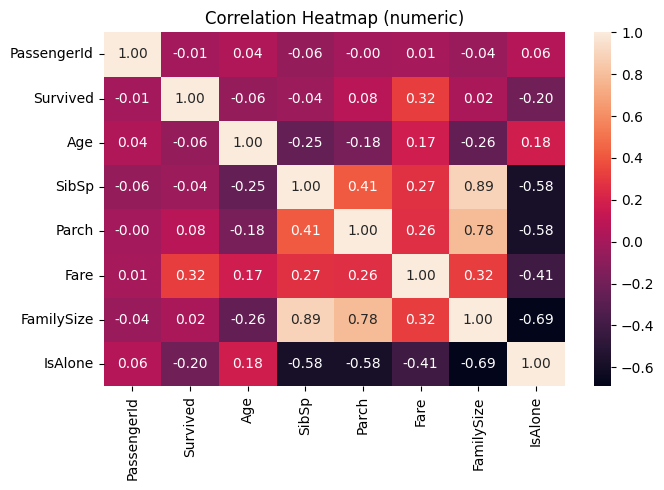

In [12]:
num = df.select_dtypes(include=["number"]).copy()  
corr = num.corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap (numeric)")
savefig("corr_heatmap_numeric.png")


corr["Survived"].sort_values(ascending=False)


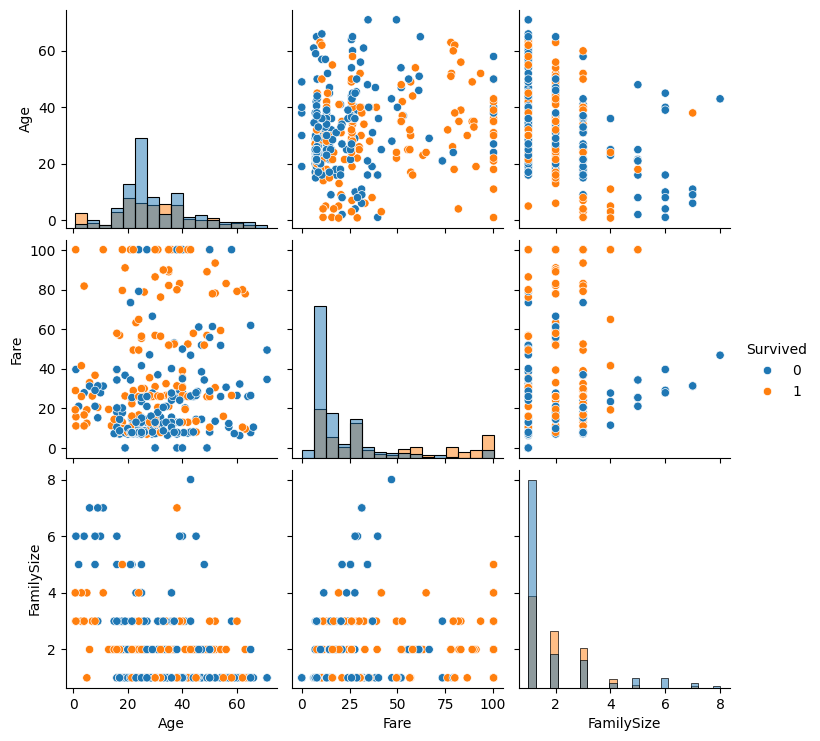

In [13]:
cols = [c for c in ["Age","Fare","FamilySize","Survived"] if c in df.columns]
sample = df[cols].dropna().sample(n=min(400, len(df)), random_state=42)
g = sns.pairplot(sample, hue="Survived", diag_kind="hist")
g.savefig(figdir / "pairplot_selected.png", dpi=200, bbox_inches="tight")


In [14]:
for col, s in summary_tables.items():
    s.to_frame("survival_rate").to_csv(figdir / f"survival_rate_by_{col}.csv")
print("Saved survival-rate tables in:", figdir)


Saved survival-rate tables in: ..\reports\figures
